In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
from matplotlib.pyplot import xticks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
cars_data = pd.read_csv('AutoData (1).csv')
cars_data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars_data.shape

(205, 25)

In [4]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
#describe the data
cars_data.describe(percentiles = [0.10,0.25,0.50,0.75,0.90,0.99])

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
10%,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000,6657.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,3.000000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,10.940000,160.000000,5780.000000,31.600000,38.000000,22563.000000
99%,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000


# data cleaning

In [6]:
# Checking Null values
cars_data.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
#symboling column- Its assigned insurance risk rating, 
#A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
cars_data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

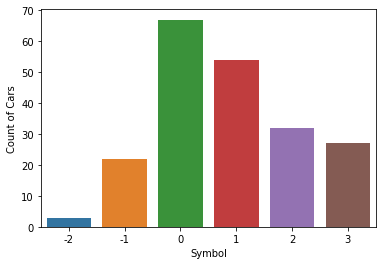

<Figure size 432x288 with 0 Axes>

In [8]:
plt1 = sns.countplot(cars_data['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

# average price of cars in each symbol category.

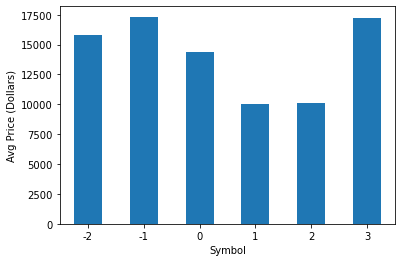

In [9]:
plt1 = cars_data[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

In [10]:
#column "make"
cars_data.make.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

In [11]:
cars_data['brand'] = cars_data.make.str.split(' ').str.get(0).str.upper()
len(set(cars_data.brand.values))


27

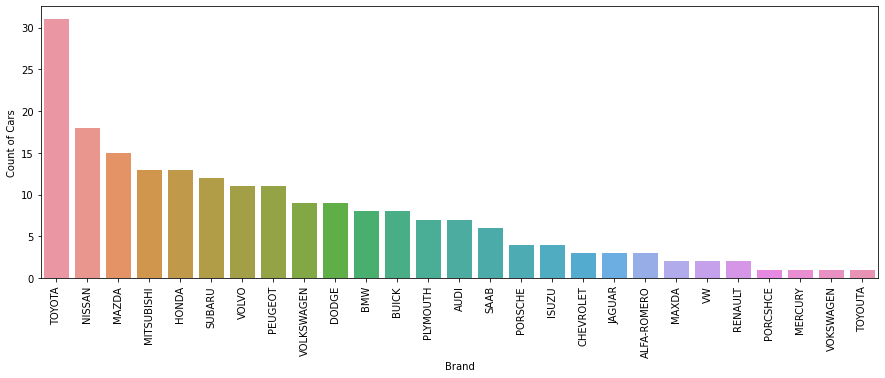

<Figure size 432x288 with 0 Axes>

In [12]:
# Let's see companies and their no of models.
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(cars_data['brand'], order=pd.value_counts(cars_data['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [13]:
#inference in brand names:-
#VOLKSWAGON has three different values as VOLKSWAGEN, VOKSWAGEN and VW
#MAZDA is also spelled as MAXDA
#PORSCHE as PORSCHE and PORCSCHE.

In [14]:
# Let's fix these data issues.

cars_data['brand'] = cars_data['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
cars_data['brand'] = cars_data['brand'].replace(['MAXDA'], 'MAZDA')
cars_data['brand'] = cars_data['brand'].replace(['PORCSHCE'], 'PORSCHE')
cars_data['brand'] = cars_data['brand'].replace(['TOYOUTA'], 'TOYOTA')

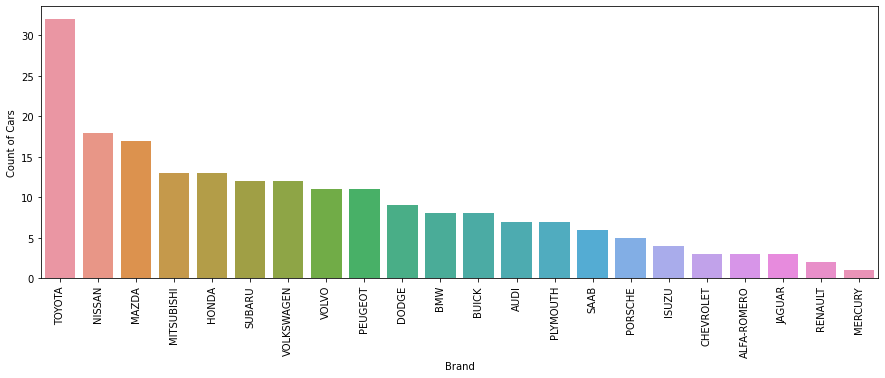

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(cars_data['brand'], order=pd.value_counts(cars_data['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()


In [16]:
cars_data.brand.describe()

count        205
unique        22
top       TOYOTA
freq          32
Name: brand, dtype: object

In [17]:
cars_data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI


In [18]:
# fueltype - Car fuel type i.e gas or diesel
cars_data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

<AxesSubplot:xlabel='fueltype', ylabel='price'>

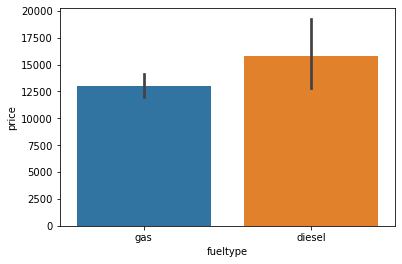

In [19]:
sns.barplot(x='fueltype',y='price',data=cars_data)

In [20]:
#aspiration - Aspiration used in a car
cars_data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

<AxesSubplot:xlabel='aspiration', ylabel='price'>

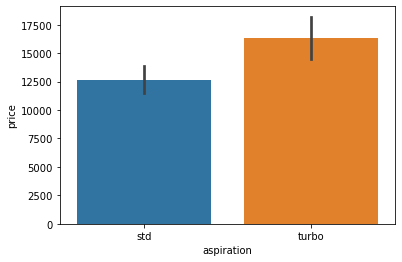

In [21]:
sns.barplot(x='aspiration',y='price',data=cars_data)

In [22]:
#doornumber - Number of doors in a car
cars_data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [23]:
#As there are numbers, let us convert these numbers into numeric form.
def number_(x):
    return x.map({'four':4, 'two': 2})
    
cars_data['doornumber'] = cars_data[['doornumber']].apply(number_)

In [24]:
#rechecking
cars_data['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

<AxesSubplot:xlabel='doornumber', ylabel='price'>

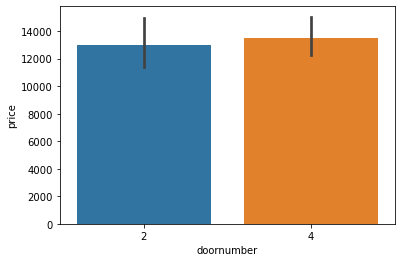

In [25]:
sns.barplot(x='doornumber',y='price',data=cars_data)

In [26]:
#carbody- body of car
cars_data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

<AxesSubplot:xlabel='carbody', ylabel='price'>

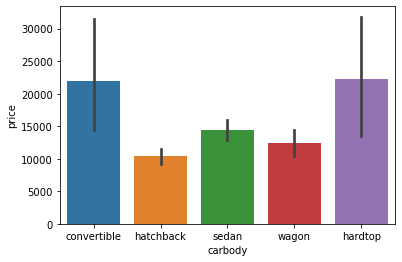

In [27]:
sns.barplot(x='carbody',y='price',data=cars_data)

In [28]:
#drivewheel - type of drive wheel
cars_data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

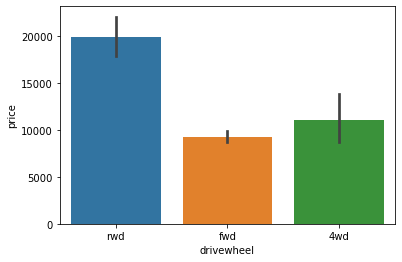

In [29]:
sns.barplot(x='drivewheel',y='price',data=cars_data)

In [30]:
#enginelocation - Location of car engine
cars_data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

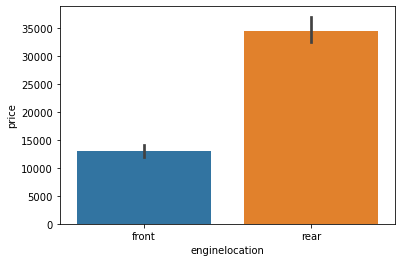

In [31]:
sns.barplot(x='enginelocation',y='price',data=cars_data)

In [32]:
#wheelbase - Weelbase of car 
cars_data['wheelbase'].value_counts(86.6,120.9).head()

94.5    0.102439
93.7    0.097561
95.7    0.063415
96.5    0.039024
98.4    0.034146
Name: wheelbase, dtype: float64

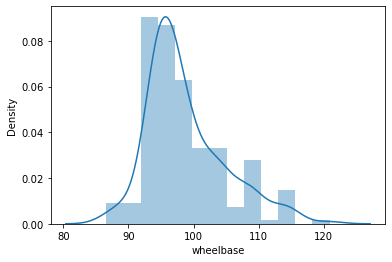

In [33]:
sns.distplot(cars_data['wheelbase'])
plt.show()

In [34]:
#carlength - Length of car
cars_data['carlength'].value_counts(141.1,208.1).head()

157.3    0.073171
188.8    0.053659
166.3    0.034146
171.7    0.034146
186.7    0.034146
Name: carlength, dtype: float64

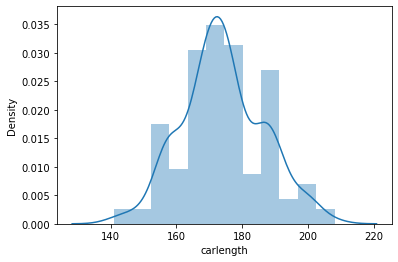

In [35]:
sns.distplot(cars_data['carlength'])
plt.show()

In [36]:
#carwidth - width of car
cars_data['carwidth'].value_counts(60.3,72.3).head()

63.8    0.117073
66.5    0.112195
65.4    0.073171
63.6    0.053659
64.4    0.048780
Name: carwidth, dtype: float64

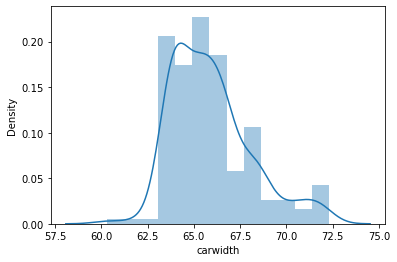

In [37]:
sns.distplot(cars_data['carwidth'])
plt.show()

In [38]:
#carheight - height of car
cars_data['carheight'].value_counts(47.8,59.8).head()

50.8    0.068293
52.0    0.058537
55.7    0.058537
54.5    0.048780
54.1    0.048780
Name: carheight, dtype: float64

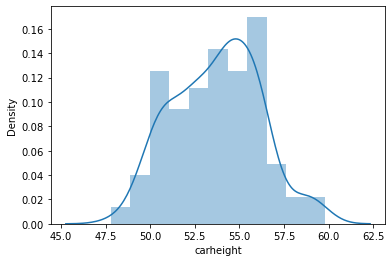

In [39]:
sns.distplot(cars_data['carheight'])
plt.show()

In [40]:
#carweight - weight of car
cars_data['curbweight'].value_counts(1488,4066).head()

2385    0.019512
1989    0.014634
1918    0.014634
2275    0.014634
3230    0.009756
Name: curbweight, dtype: float64

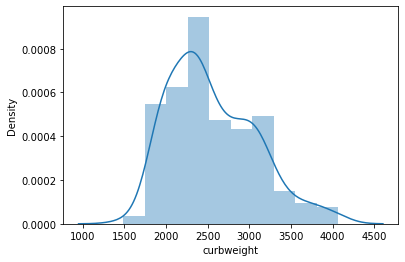

In [41]:
sns.distplot(cars_data['curbweight'])
plt.show()

In [42]:
#enginetype - Type of engine.
cars_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [43]:
#cylindernumber- cylinder placed in the car
cars_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [44]:
#fuelsystem - Fuel system of car
cars_data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [45]:
# enginesize 
cars_data['enginesize'].value_counts(61,326)

122    0.073171
92     0.073171
98     0.068293
97     0.068293
108    0.063415
90     0.058537
110    0.058537
109    0.039024
120    0.034146
141    0.034146
152    0.029268
121    0.029268
146    0.029268
181    0.029268
91     0.024390
156    0.024390
136    0.024390
130    0.019512
183    0.019512
194    0.014634
164    0.014634
171    0.014634
209    0.014634
70     0.014634
234    0.009756
131    0.009756
134    0.009756
140    0.009756
258    0.009756
132    0.009756
111    0.004878
103    0.004878
145    0.004878
151    0.004878
119    0.004878
173    0.004878
203    0.004878
80     0.004878
79     0.004878
326    0.004878
61     0.004878
308    0.004878
304    0.004878
161    0.004878
Name: enginesize, dtype: float64

Text(0, 0.5, 'Price of Car (Dollars)')

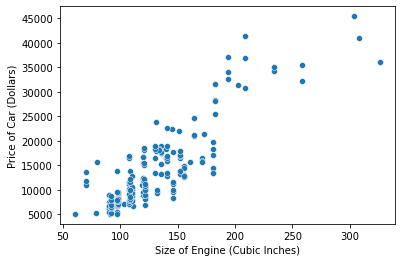

In [46]:
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data =cars_data)
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')

In [47]:
#boreratio  
cars_data['boreratio'].value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    12
3.46     9
3.78     8
3.43     8
3.31     8
3.27     7
2.91     7
3.33     6
3.39     6
3.54     6
3.05     6
3.58     6
3.01     5
3.70     5
3.35     4
3.17     3
3.59     3
3.74     3
3.13     2
3.24     2
3.63     2
3.80     2
3.94     2
3.47     2
3.50     2
3.61     1
2.92     1
3.08     1
2.99     1
3.76     1
2.68     1
3.34     1
3.60     1
2.54     1
Name: boreratio, dtype: int64

Text(0, 0.5, 'Price of Car (Dollars)')

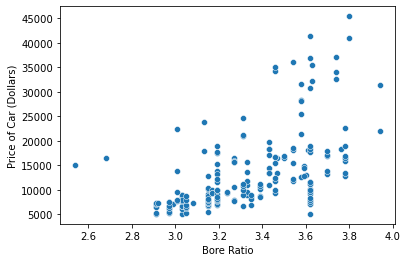

In [48]:
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data =cars_data)
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')


In [49]:
#stroke            
cars_data['stroke'].value_counts()

3.400    20
3.030    14
3.150    14
3.230    14
3.390    13
2.640    11
3.350     9
3.290     9
3.460     8
3.410     6
3.190     6
3.070     6
3.110     6
3.580     6
3.270     6
3.500     6
3.520     5
3.640     5
3.860     4
3.470     4
3.255     4
3.540     4
3.900     3
2.900     3
3.100     2
3.080     2
2.800     2
2.680     2
2.190     2
4.170     2
3.160     1
2.070     1
2.760     1
3.120     1
2.870     1
3.210     1
2.360     1
Name: stroke, dtype: int64

Text(0, 0.5, 'Price of Car (Dollars)')

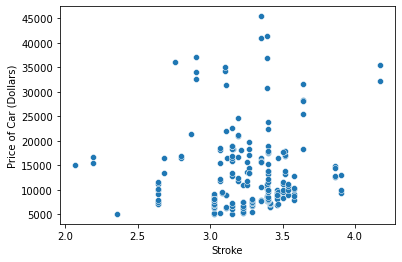

In [50]:
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data =cars_data )
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')

In [51]:
#compressionratio  
cars_data['compressionratio'].value_counts(7,23)

9.00     0.224390
9.40     0.126829
8.50     0.068293
9.50     0.063415
9.30     0.053659
8.70     0.043902
9.20     0.039024
8.00     0.039024
7.00     0.034146
21.00    0.024390
7.50     0.024390
9.60     0.024390
23.00    0.024390
8.40     0.024390
8.60     0.024390
21.50    0.019512
7.60     0.019512
10.00    0.014634
22.50    0.014634
8.30     0.014634
8.80     0.014634
7.70     0.009756
8.10     0.009756
9.31     0.004878
21.90    0.004878
22.00    0.004878
11.50    0.004878
9.41     0.004878
10.10    0.004878
9.10     0.004878
22.70    0.004878
7.80     0.004878
Name: compressionratio, dtype: float64

Text(0, 0.5, 'Price of Car (Dollars)')

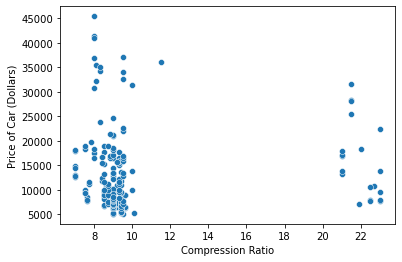

In [52]:
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data =cars_data)
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')

In [53]:
#horsepower        
cars_data['horsepower'].value_counts(7,23)

68     0.092683
70     0.053659
69     0.048780
116    0.043902
110    0.039024
95     0.034146
88     0.029268
62     0.029268
160    0.029268
101    0.029268
114    0.029268
102    0.024390
90     0.024390
82     0.024390
145    0.024390
84     0.024390
76     0.024390
97     0.024390
123    0.019512
86     0.019512
92     0.019512
111    0.019512
85     0.014634
73     0.014634
207    0.014634
182    0.014634
121    0.014634
152    0.014634
112    0.009756
184    0.009756
162    0.009756
161    0.009756
156    0.009756
155    0.009756
176    0.009756
94     0.009756
56     0.009756
100    0.009756
52     0.009756
175    0.004878
60     0.004878
64     0.004878
55     0.004878
48     0.004878
288    0.004878
58     0.004878
78     0.004878
72     0.004878
115    0.004878
154    0.004878
143    0.004878
142    0.004878
140    0.004878
135    0.004878
134    0.004878
200    0.004878
106    0.004878
120    0.004878
262    0.004878
Name: horsepower, dtype: float64

Text(0, 0.5, 'Price of Car (Dollars)')

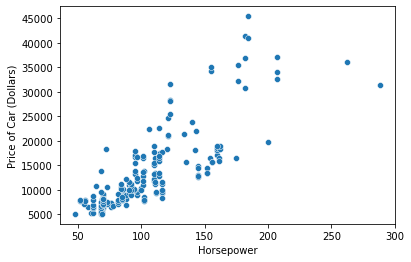

In [54]:
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data =cars_data )
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')

# City Mileage & Highway Mileage

In [55]:
# A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.
cars_data['mileage'] = cars_data['citympg']*0.55 + cars_data['highwaympg']*0.45

In [56]:
#Binning the Car Companies based on avg prices of each Company.
cars_data['price'] = cars_data['price'].astype('int')
temp = cars_data.copy()
table = temp.groupby(['make'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='make')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Luxury']
cars_data['brand_category'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars_data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,mileage,brand_category
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,ALFA-ROMERO,23.70,Medium
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,ALFA-ROMERO,23.70,Medium
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,ALFA-ROMERO,22.15,Medium
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,AUDI,26.70,Medium
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,AUDI,19.80,Medium


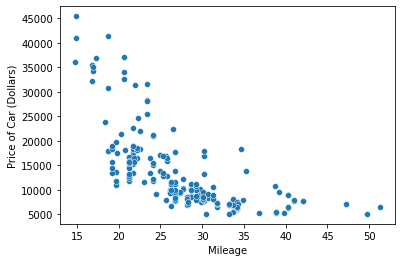

In [57]:
# Let's see how price varies with mileage.
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data =cars_data)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

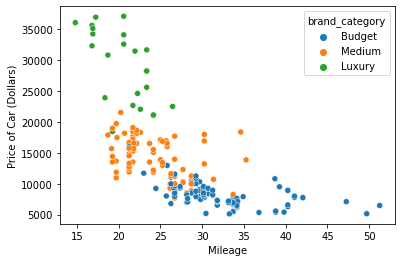

In [58]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data =cars_data )
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

Brand Category - Horsepower

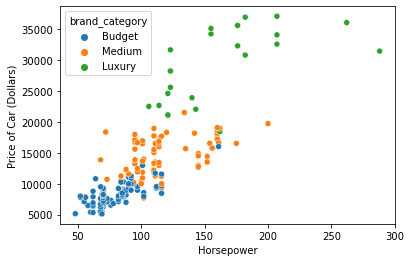

In [59]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data =cars_data )
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

Mileage - Fuel Type

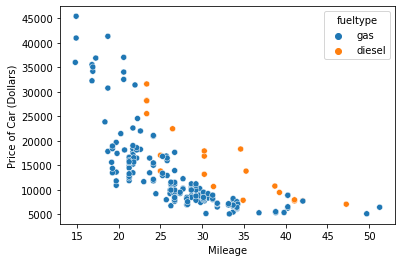

In [60]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data =cars_data )
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

Horsepower - Fuel Type

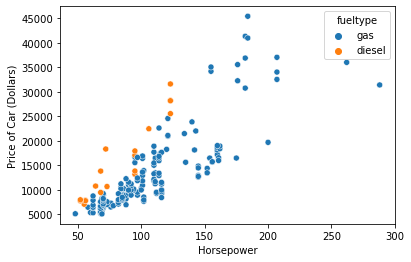

In [61]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = cars_data)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

# Linear Regression Model

In [62]:
auto = cars_data[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495,Medium,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500,Medium,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500,Medium,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950,Medium,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450,Medium,19.80


# Visualising the Data
Visualising Numeric Variables

<Figure size 1080x1080 with 0 Axes>

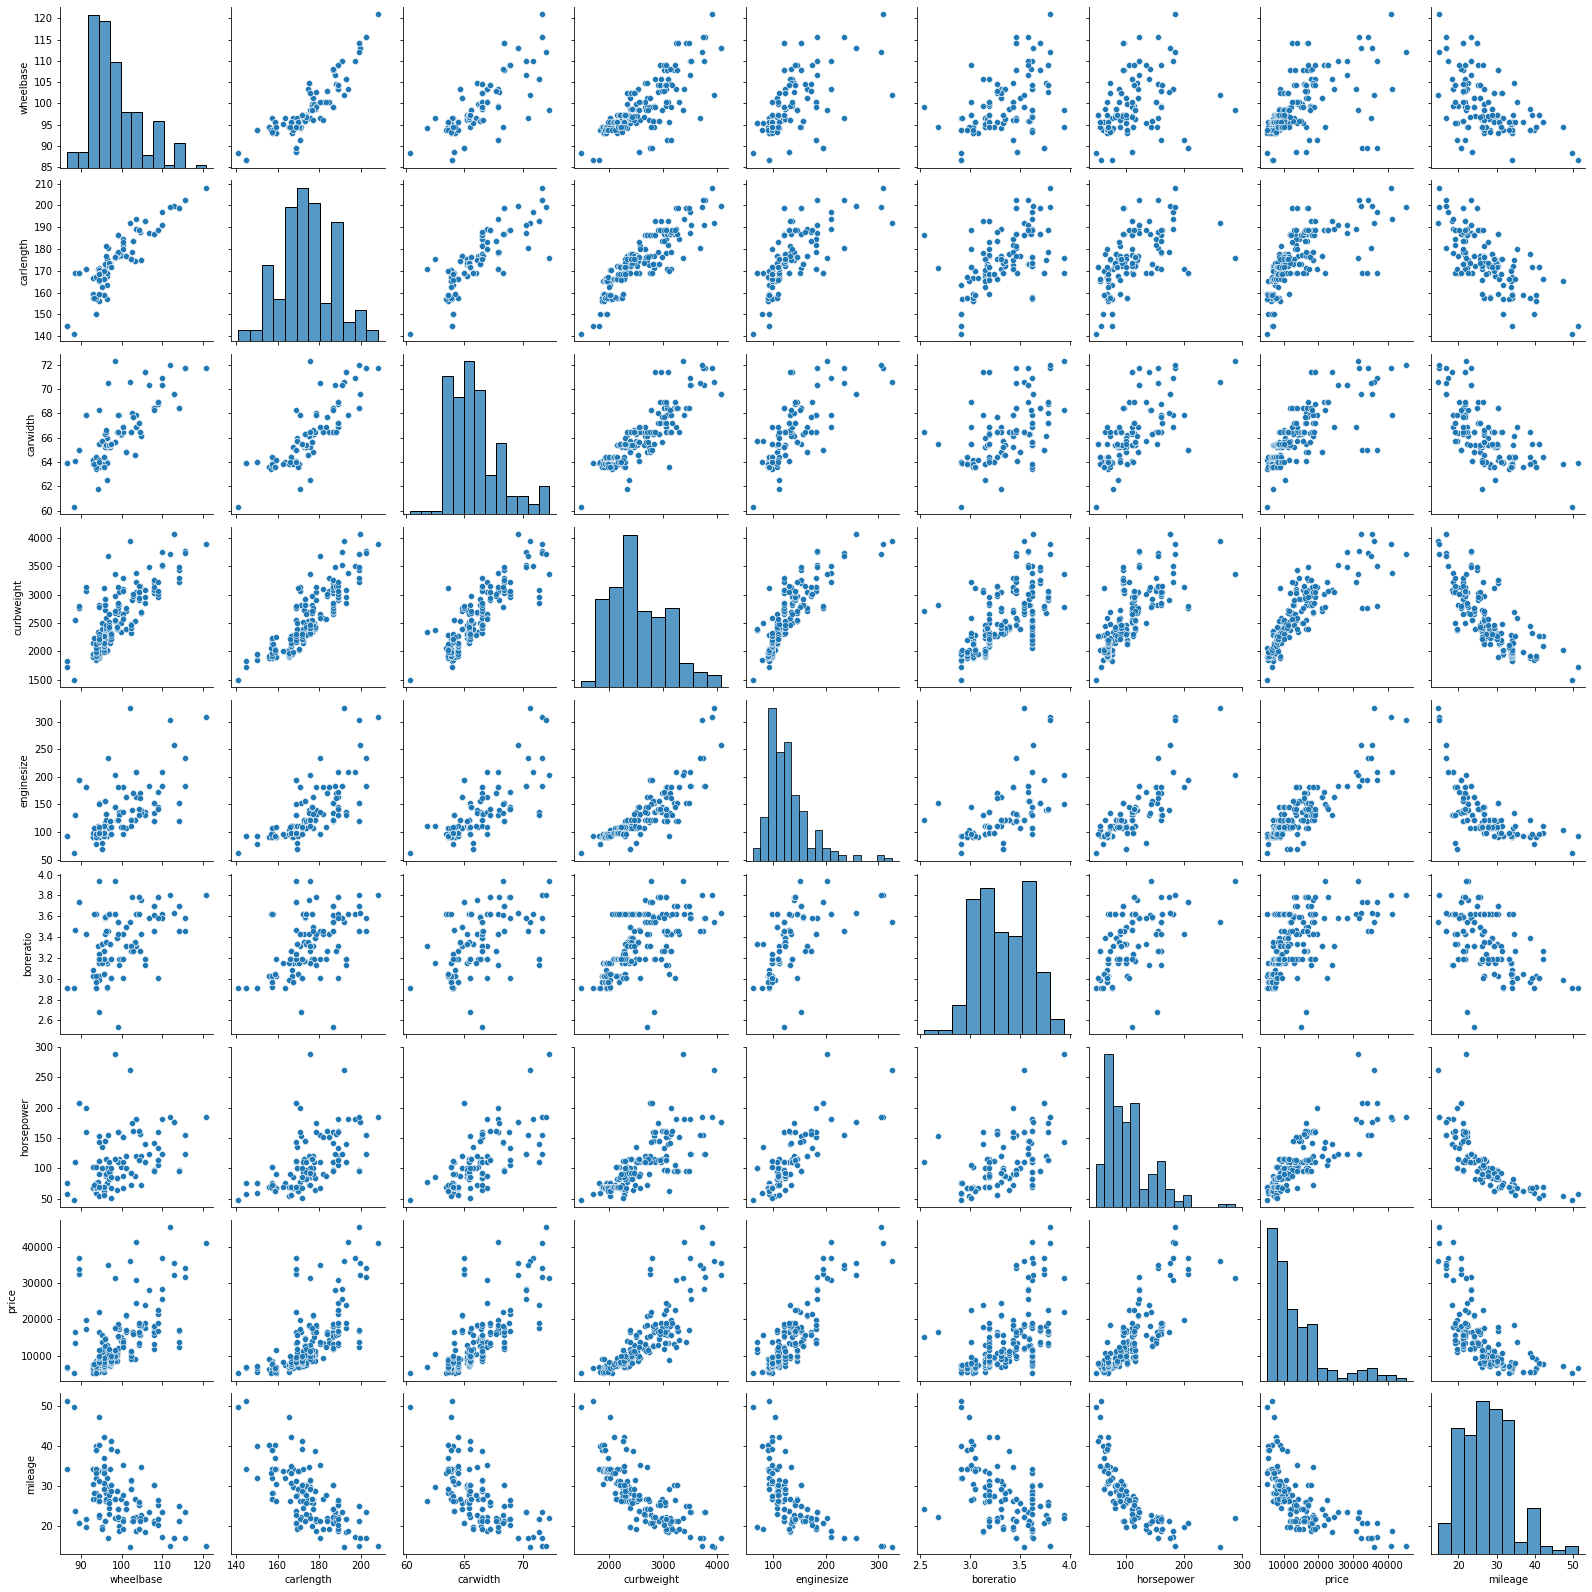

In [63]:
#Let's make a pairplot of all the numeric variables

plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

# Visualising Categorical Variables

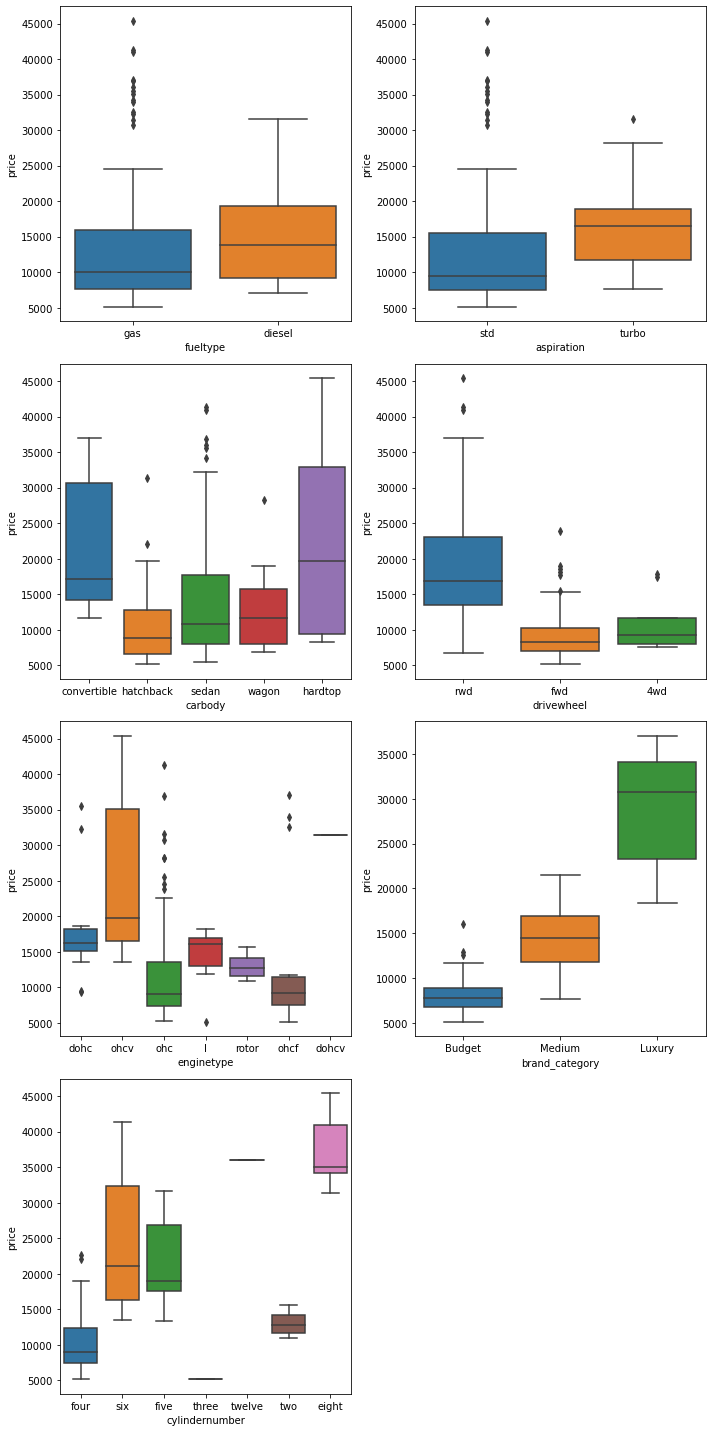

In [64]:
#Let's make a boxplot for categorical variables.

plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = auto)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = auto)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = auto)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto)
plt.tight_layout()
plt.show()

# Data Preparation
Dummy Variables
Categorical Variables are converted into Neumerical Variables with the help of Dummy Variable

In [65]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)

In [66]:
auto = pd.concat([auto, cyl_no], axis = 1)

In [67]:
brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)

In [68]:
auto = pd.concat([auto, brand_cat], axis = 1)

In [69]:
eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)

In [70]:
auto = pd.concat([auto, eng_typ], axis = 1)

In [71]:
drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)

In [72]:
auto = pd.concat([auto, drwh], axis = 1)

In [73]:
carb = pd.get_dummies(auto['carbody'], drop_first = True)

In [74]:
auto = pd.concat([auto, carb], axis = 1)

In [75]:
asp = pd.get_dummies(auto['aspiration'], drop_first = True)

In [76]:
auto = pd.concat([auto, asp], axis = 1)

In [77]:
fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)

In [78]:
auto = pd.concat([auto, fuelt], axis = 1)

In [79]:
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)

# Model Building

In [80]:
#Splitting the Data into Training and Testing sets
from sklearn.model_selection import train_test_split

In [81]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [82]:
#Rescaling the Features
# We will use min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [83]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.530864,0,...,0,0,1,0,0,0,1,0,0,1
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.213992,0,...,0,0,0,1,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.344307,0,...,0,0,0,1,0,1,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.244170,0,...,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.122085,0,...,0,0,0,1,0,0,0,1,1,1


In [84]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219309,0.358265,0.062937,...,0.062937,0.027972,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.181818,0.909091
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,0.185980,0.243703,...,0.243703,0.165472,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.387050,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.198903,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,0.344307,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,0.512346,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


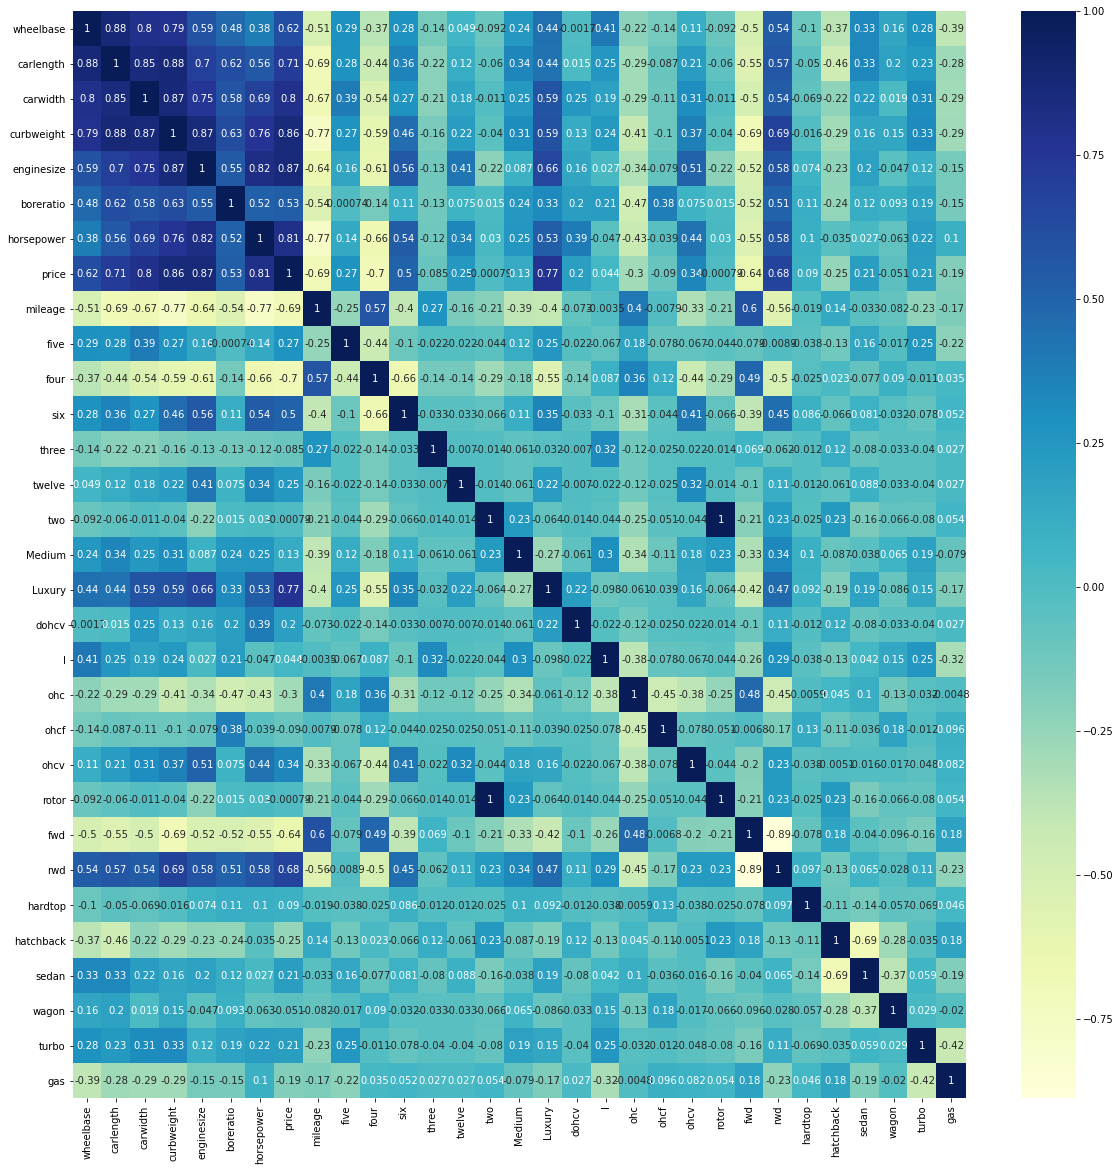

In [85]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [86]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train

In [87]:
#RFE(Recursive feature elimination)
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [88]:
# Running RFE with the output number of the variable equal to 10
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 10)             
rfe = rfe.fit(X_train, y_train)

In [89]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', False, 17),
 ('carwidth', False, 14),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 13),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('five', False, 5),
 ('four', False, 3),
 ('six', False, 4),
 ('three', False, 20),
 ('twelve', True, 1),
 ('two', False, 16),
 ('Medium', False, 21),
 ('Luxury', True, 1),
 ('dohcv', True, 1),
 ('l', False, 8),
 ('ohc', False, 6),
 ('ohcf', False, 7),
 ('ohcv', False, 18),
 ('rotor', False, 12),
 ('fwd', False, 15),
 ('rwd', False, 19),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 10),
 ('gas', False, 9)]

In [90]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'curbweight', 'horsepower', 'mileage', 'twelve', 'Luxury',
       'dohcv', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [91]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# model 1

In [92]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [93]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     119.8
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           3.68e-61
Time:                        18:35:35   Log-Likelihood:                 182.13
No. Observations:                 143   AIC:                            -342.3
Df Residuals:                     132   BIC:                            -309.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0757      0.049     -1.553      0.1

In [104]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.35
2,curbweight,10.40
9,sedan,7.45
3,horsepower,6.98
8,hatchback,6.30
1,wheelbase,5.09
10,wagon,4.07
4,mileage,3.68
6,Luxury,1.73
7,dohcv,1.60


Dropping twelve as p-value is high than the significance value of 0.05,
hence dropping it as it is insignificant in presence of other variables.

In [95]:
X_train_new1 = X_train_rfe.drop(["twelve"], axis = 1)

# model 2

In [96]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lr = sm.add_constant(X_train_new1)

lr = sm.OLS(y_train,X_train_lr).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     131.9
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           8.47e-62
Time:                        18:35:35   Log-Likelihood:                 181.03
No. Observations:                 143   AIC:                            -342.1
Df Residuals:                     133   BIC:                            -312.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0585      0.047     -1.234      0.2

In [106]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,64.16
2,curbweight,10.40
8,sedan,7.31
3,horsepower,6.32
7,hatchback,6.25
1,wheelbase,5.03
9,wagon,3.99
4,mileage,3.53
5,Luxury,1.71
6,dohcv,1.49


This leaves mileage insignificant.
Dropping hardtop as p value is high than the significance value of 0.05,
hence dropping it as it is insignificant in presence of other variables

In [107]:
X_train_new2 = X_train_new1.drop(["mileage"], axis = 1)

# model 3

In [108]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lr = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train,X_train_lr).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     146.4
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           2.31e-62
Time:                        18:49:13   Log-Likelihood:                 179.70
No. Observations:                 143   AIC:                            -341.4
Df Residuals:                     134   BIC:                            -314.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.031     -0.043      0.9

In [109]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.79
2,curbweight,10.20
7,sedan,7.22
6,hatchback,6.20
1,wheelbase,4.98
3,horsepower,4.73
8,wagon,3.98
4,Luxury,1.68
5,dohcv,1.35


Dropping curbweight as p-value is high than the significance value of 0.05,
hence dropping it as it is insignificant in presence of other variables.

In [110]:
X_train_new3 = X_train_new2.drop(["curbweight"], axis = 1)

# model 4

In [111]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lr = sm.add_constant(X_train_new3)

lr = sm.OLS(y_train,X_train_lr).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     152.4
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           7.35e-61
Time:                        18:51:47   Log-Likelihood:                 173.26
No. Observations:                 143   AIC:                            -330.5
Df Residuals:                     135   BIC:                            -306.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0281      0.031      0.908      0.3

In [112]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,24.86
6,sedan,6.73
5,hatchback,5.76
7,wagon,3.96
1,wheelbase,1.83
2,horsepower,1.76
3,Luxury,1.62
4,dohcv,1.26


Dropping sedan as VIF value is high than the significance value of 0.05,
hence dropping it as it is insignificant in presence of other variables.

In [113]:
X_train_new4 = X_train_new3.drop(["sedan"], axis = 1)

# model 5

In [114]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lr = sm.add_constant(X_train_new4)

lr = sm.OLS(y_train,X_train_lr).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     164.9
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           7.19e-60
Time:                        18:52:53   Log-Likelihood:                 168.06
No. Observations:                 143   AIC:                            -322.1
Df Residuals:                     136   BIC:                            -301.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0515      0.019     -2.735      0.0

In [115]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.79
2,curbweight,10.20
7,sedan,7.22
6,hatchback,6.20
1,wheelbase,4.98
3,horsepower,4.73
8,wagon,3.98
4,Luxury,1.68
5,dohcv,1.35


Dropping wagon as VIF value is high than the significance value of 0.05,
hence dropping it as it is insignificant in presence of other variables.

In [116]:
X_train_new5 = X_train_new4.drop(["wagon"], axis = 1)

# model 6

In [117]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lr = sm.add_constant(X_train_new5)

lr = sm.OLS(y_train,X_train_lr).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     196.1
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.32e-60
Time:                        18:54:44   Log-Likelihood:                 167.01
No. Observations:                 143   AIC:                            -322.0
Df Residuals:                     137   BIC:                            -304.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0553      0.019     -2.953      0.0

In [118]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.48
2,horsepower,1.68
3,Luxury,1.55
1,wheelbase,1.51
4,dohcv,1.24
5,hatchback,1.20


Dropping dohcv to see if any change in model.

In [119]:
X_train_new6 = X_train_new5.drop(["dohcv"], axis = 1)

# model 7

In [120]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lr = sm.add_constant(X_train_new6)

lr  = sm.OLS(y_train,X_train_lr).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.0
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           5.56e-60
Time:                        18:55:49   Log-Likelihood:                 162.59
No. Observations:                 143   AIC:                            -315.2
Df Residuals:                     138   BIC:                            -300.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0502      0.019     -2.621      0.0

# Residual Analysis of the train data
So,now to check if the error terms are also normally distributed
(which is infact, one of the major assumptions of linear regression),
let us plot the histogram of the error terms and see what it looks like.

In [121]:
y_train_price = lr.predict(X_train_lr)

Text(0.5, 0, 'Errors')

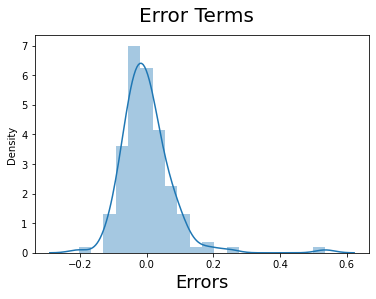

In [122]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)    

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

# Making Predictions
Applying the scaling on the test sets

In [123]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_test[num_vars] = scaler.transform(df_test[num_vars])
##Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [124]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['carwidth', 'horsepower', 'Luxury', 'hatchback']]

In [125]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_pred = lr.predict(X_test_new)

# Model Evaluation

In [126]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.756277875449912

Text(0, 0.5, 'y_pred')

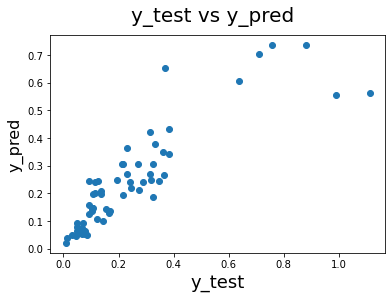

In [127]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_pred', fontsize=16)                          

# We can see that the equation of our best fitted line is:
price = 0.3957 carwidth + 0.4402 horsepower + 0.2794 luxury -0.0414 hatchback -0.0824


# These are the variables that are significant in predicting the price of a car.
enginesize,
carwidth,
horsepower,
Luxury,
hatchback

In [128]:
#Evaluation of the model using Statistics
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.0
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           5.56e-60
Time:                        19:01:11   Log-Likelihood:                 162.59
No. Observations:                 143   AIC:                            -315.2
Df Residuals:                     138   BIC:                            -300.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0502      0.019     -2.621      0.0